In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15,6),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [80]:
# Leer datos demográficos noviembre 2018 para calcular actuaciones por distrito ponderadas por habitantes
demo = pd.read_csv('201812_Rango_Edades_Seccion_201811.csv',encoding = 'iso-8859-1',delimiter = ';')
# Crear nuevos campos. Convertir primero NaN a 0
demo.fillna(0, inplace=True)
demo['habitantes'] = demo['EspanolesHombres']+demo['EspanolesMujeres']+demo['ExtranjerosHombres']+demo['ExtranjerosMujeres']
demo_distrito = demo.groupby(['DESC_DISTRITO'])['habitantes'].sum().reset_index()

In [81]:
# Leer datos de actuaciones de bomberos desde 2017 a ene-2019
bom = pd.read_csv('201902_ActuacionesBomberos_2017-2018.csv',encoding = 'iso-8859-1',delimiter = ';')
bom.head()

,distrito,FUEGOS,CONSTRUCCION,SALVAMENTOS,AGUA,DIVERSOS,SIN INTERVENCION,SERVICIOS,year,mes
0,CENTRO,22,31,38,21,32,14,6,2018,1
1,ARGANZUELA,15,2,21,7,15,18,9,2018,1
2,RETIRO,8,2,18,3,7,8,4,2018,1
3,SALAMANCA,16,7,25,8,13,8,3,2018,1
4,CHAMARTIN,18,6,19,10,22,5,5,2018,1


In [82]:
# Sumamos todas las intervenciones por alertas positivas
bom['intervenciones'] = bom['FUEGOS'] + bom['CONSTRUCCION'] + bom['SALVAMENTOS'] + bom['AGUA'] + bom['DIVERSOS']
bom.head()

,distrito,FUEGOS,CONSTRUCCION,SALVAMENTOS,AGUA,DIVERSOS,SIN INTERVENCION,SERVICIOS,year,mes,intervenciones
0,CENTRO,22,31,38,21,32,14,6,2018,1,144
1,ARGANZUELA,15,2,21,7,15,18,9,2018,1,60
2,RETIRO,8,2,18,3,7,8,4,2018,1,38
3,SALAMANCA,16,7,25,8,13,8,3,2018,1,69
4,CHAMARTIN,18,6,19,10,22,5,5,2018,1,75


In [83]:
distritos = bom.groupby(['distrito'])[['intervenciones', 'SIN INTERVENCION']].sum().reset_index()

distritos.head()

,distrito,intervenciones,SIN INTERVENCION
0,ARGANZUELA,1385,169
1,BARAJAS,383,61
2,CARABANCHEL,2093,239
3,CENTRO,2533,317
4,CHAMARTIN,1382,139


In [84]:
# Juntar datos de demografia con datos de actuaciones de bomberos
distritos.sort_values(['distrito'], ascending = False, inplace = True)
demo_distrito.sort_values(['DESC_DISTRITO'], ascending = False, inplace = True)
distritos = pd.merge(distritos, demo_distrito, how="inner", left_index= True, right_index= True)

#Calcular intervenciones ponderadas por habitantes
distritos['interven_hab'] = distritos['intervenciones']/distritos['habitantes']*1000
distritos['sin_interven_hab'] = distritos['SIN INTERVENCION']/distritos['habitantes']*1000


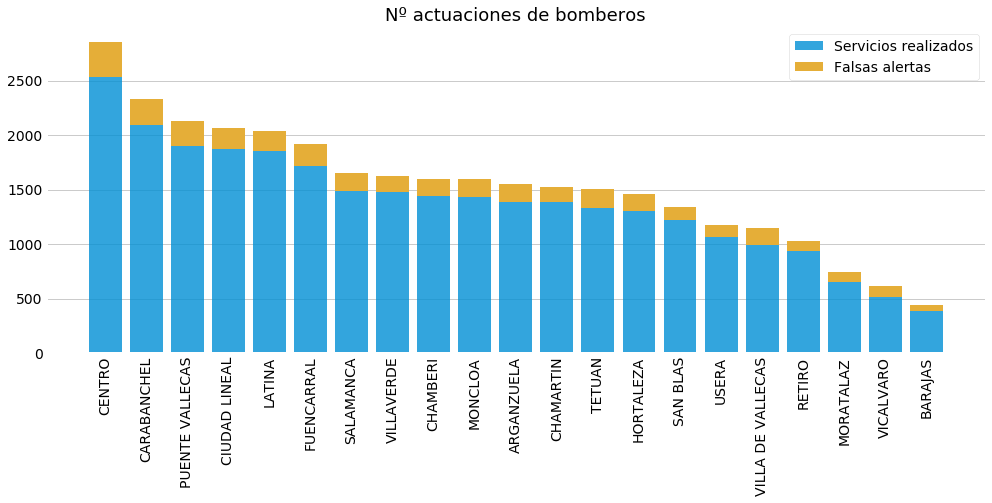

In [85]:
# dibujar actuaciones por distritos
distritos.sort_values(['intervenciones'], ascending = False, inplace = True)

x = distritos['distrito']
y1 = distritos['intervenciones']
y2 = distritos['SIN INTERVENCION']

plt.bar(x, y1, alpha=0.8, color=sns.color_palette()[0], label = 'Servicios realizados')
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2], bottom = y1, label = 'Falsas alertas')

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Nº actuaciones de bomberos',fontsize= 18)
plt.savefig('images/actuaciones_bomberos.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

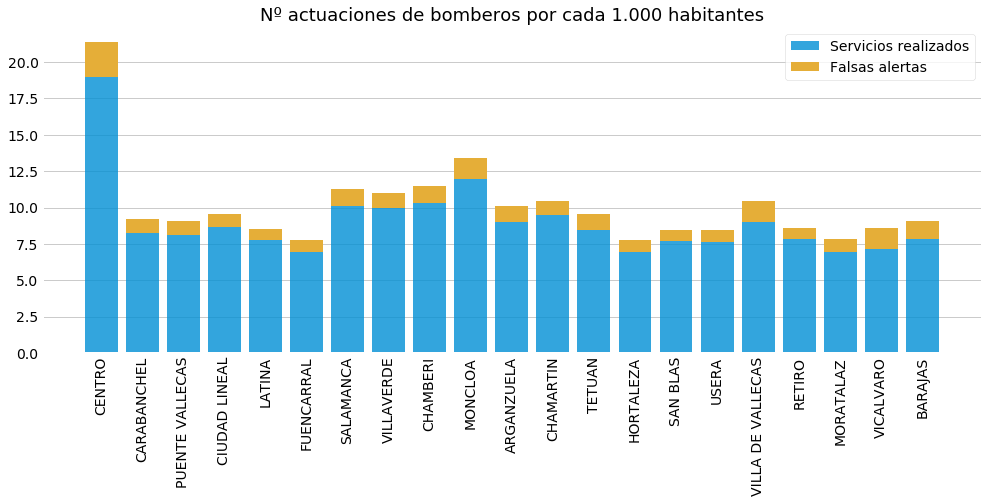

In [86]:
# dibujar actuaciones por distritos podnderados por cada 1.000habitantes
distritos.sort_values(['intervenciones'], ascending = False, inplace = True)

x = distritos['distrito']
y1 = distritos['interven_hab']
y2 = distritos['sin_interven_hab']

plt.bar(x, y1, alpha=0.8, color=sns.color_palette()[0], label = 'Servicios realizados')
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2], bottom = y1, label = 'Falsas alertas')

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Nº actuaciones de bomberos por cada 1.000 habitantes',fontsize= 18)
plt.savefig('images/actuaciones_bomberos_hab.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [87]:
# Evolucion temporal de los servicios
fecha = bom.groupby(['year','mes'])[['intervenciones', 'SIN INTERVENCION']].sum().reset_index()
fecha.sort_values(['year', 'mes'], ascending = True, inplace = True)
fecha.head()

,year,mes,intervenciones,SIN INTERVENCION
0,2017,8,1927,228
1,2017,9,1459,195
2,2017,10,1419,216
3,2017,11,1317,203
4,2017,12,1598,213


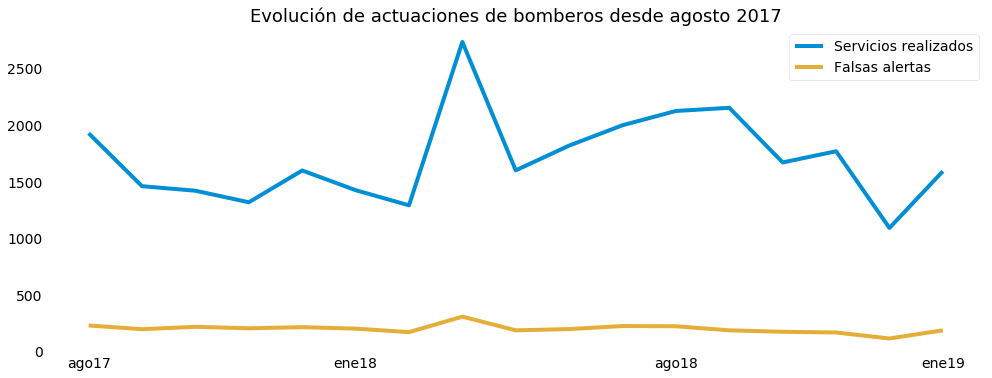

In [27]:
x = fecha.index
y1 = fecha['intervenciones']
y2 = fecha['SIN INTERVENCION']

labels = []
for n in range(17):
    labels.append('')
labels[0]= 'ago17'
labels[5]= 'ene18'
labels[11]= 'ago18'
labels[16]= 'ene19'

plt.plot(x,y1, label='Servicios realizados', color=sns.color_palette()[0])
plt.plot(x,y2, label='Falsas alertas', color=sns.color_palette()[2])

plt.xticks(x, labels, rotation='horizontal')
#plt.axis(ymin= 0 , ymax=1.00)desde 
plt.title('Evolución de actuaciones de bomberos desde agosto 2017',fontsize= 18)
plt.legend()
#plt.savefig('images/homicidios.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()